<div class="alert alert-block alert-info">
<b> Часть С — Exploratory Data Analysis (EDA)</b> 

</div>

**Переменные:**
- hashed_user_id — идентификатор пользователя;
- user_age — возраст;
- user_friends — количество друзей;
- user_communities_count — количество сообществ, в которых он состоит;
- user_fans_count — количество людей, подписанных на пользователя;
- user_subscriptions_count — количество подписок (людей или сообществ) пользователя;
- user_blacklist_count — количество профилей, помещенных в чёрный список;
- user_blacklisted_by_count — сколько раз пользователя помещали в чёрные списки;
- device_brand — производитель устройства пользователя;
- device_model — модель устройства;
- days_in_vk_1_week — количество дней присутствия в VK за последнюю неделю;
- days_in_vk_2_weeks — количество дней присутствия в VK за последние 2 недели;
- days_in_vk_4_weeks — количество дней присутствия в VK за последние 4 недели;
- messaging_total — общее количество отправленных сообщений;
- calls_accepted — количество принятых звонков;
- timespent_total — проведённое время в VK за день (суммарно);
- timespent_im — время, затраченное на личные сообщения;
- timespent_feed — время, затраченное на чтение ленты;
- timespent_photo — время, затраченное на просмотр фотографий;
- timespent_video — время, затраченное на просмотр видео;
- timespent_clips — время, затраченное на просмотр клипов;
- timespent_audio — время, затраченное на прослушивание музыки;
- timespent_story — время, затраченное на просмотр историй.

**Задачи:**

> Сколько различных групп пользователей можно выделить из данных?

> Каковы отличительные особенности этих групп? Как их можно интерпретировать?

In [144]:
import numpy as np 
import pandas as pd
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [145]:
vk_data = pd.read_csv('https://transfer.vkpartner.ru/files/10d6df773bf0++10822606-2efb-44cd-bbcd-47dd377ab52e')

In [146]:
vk_data.head()

hashed_user_id  user_age user_sex  user_friends  user_communities_count  \
0  $1VAQ97BmCCZc        26     male           481                     476   
1  $1v/FKogrWnz2        26   female           115                      72   
2  $1eoMEtyVB3XM        26   female           297                     317   
3  $12ZhvNRMpcZU        20     male           147                     130   
4  $1mD0tDgB13tk        39     male           138                     311   

   user_fans_count  user_subscriptions_count device_brand       device_model  \
0              361                       177          lge            LG-M250   
1              419                         0        Apple           iPhone 7   
2             2681                         0        Apple  iPhone 11 Pro Max   
3              216                         0      samsung           SM-G970F   
4               51                        33          NaN                NaN   

   days_in_vk_1_week  ...  messaging_total  calls_accepted  timespent_total  \
0                  7  ...                1               0              501   
1                  7  ...               23               0                0   
2                  7  ...               33               0                0   
3                  7  ...                1               0             5085   
4                  7  ...                3               0             1301   

   timespent_im  timespent_feed  timespent_photo  timespent_video  \
0             0              55                0                0   
1             0               0                0                0   
2             0               0                0                0   
3           101            2371                0                0   
4             0               0                0                0   

   timespent_clips  timespent_audio  timespent_story  
0                0                0                0  
1                0                0                0  
2                0                0                0  
3                0                0                0  
4                0                0                0  

[5 rows x 23 columns]

Воспользуемся атрибутом shape, чтобы узнать размерность наших данных

In [147]:
vk_data.shape

(125893, 23)

Посмотрим на типы данных каждого столбца и также посмотрим есть ли отсутствующие значения в данных

In [148]:
vk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125893 entries, 0 to 125892
Data columns (total 23 columns):
hashed_user_id              125893 non-null object
user_age                    125893 non-null int64
user_sex                    125893 non-null object
user_friends                125893 non-null int64
user_communities_count      125893 non-null int64
user_fans_count             125893 non-null int64
user_subscriptions_count    125893 non-null int64
device_brand                107049 non-null object
device_model                106748 non-null object
days_in_vk_1_week           125893 non-null int64
days_in_vk_2_weeks          125893 non-null int64
days_in_vk_4_weeks          125893 non-null int64
days_in_vk_8_weeks          125893 non-null int64
messaging_total             125893 non-null int64
calls_accepted              125893 non-null int64
timespent_total             125893 non-null int64
timespent_im                125893 non-null int64
timespent_feed              125893 

Видим, что у нас есть 125893 записей с 23 столбцами. Имеются отсутствующие значения в столбцах - device_brand и device_model.
Заполним пропуски в этих столбцах наиболее встречемым значением в каждом столбце.

In [149]:
vk_data = vk_data.fillna(vk_data['device_brand'].value_counts().index[0])
vk_data = vk_data.fillna(vk_data['device_model'].value_counts().index[0])

In [150]:
vk_data.isnull().sum()

hashed_user_id              0
user_age                    0
user_sex                    0
user_friends                0
user_communities_count      0
user_fans_count             0
user_subscriptions_count    0
device_brand                0
device_model                0
days_in_vk_1_week           0
days_in_vk_2_weeks          0
days_in_vk_4_weeks          0
days_in_vk_8_weeks          0
messaging_total             0
calls_accepted              0
timespent_total             0
timespent_im                0
timespent_feed              0
timespent_photo             0
timespent_video             0
timespent_clips             0
timespent_audio             0
timespent_story             0
dtype: int64

Теперь запросим описательные статистики с помощью функции describe()

In [151]:
vk_data.describe()

user_age   user_friends  user_communities_count  user_fans_count  \
count  125893.000000  125893.000000           125893.000000    125893.000000   
mean       34.459168     222.997315              232.251865       193.345929   
std        20.505505     566.932642              386.763992       737.468913   
min         0.000000       0.000000                0.000000         0.000000   
25%        22.000000      48.000000               55.000000        24.000000   
50%        28.000000     110.000000              119.000000        88.000000   
75%        41.000000     216.000000              254.000000       198.000000   
max       120.000000   10000.000000             5000.000000     61271.000000   

       user_subscriptions_count  days_in_vk_1_week  days_in_vk_2_weeks  \
count             125893.000000      125893.000000       125893.000000   
mean                  37.119109           6.671960           13.246829   
std                  226.131946           0.978889            2.063192   
min                    0.000000           1.000000            1.000000   
25%                    1.000000           7.000000           14.000000   
50%                    4.000000           7.000000           14.000000   
75%                   16.000000           7.000000           14.000000   
max                 9115.000000           7.000000           14.000000   

       days_in_vk_4_weeks  days_in_vk_8_weeks  messaging_total  \
count        125893.00000       125893.000000    125893.000000   
mean             26.35272           52.394947        53.359043   
std               4.28400            8.952063       447.576857   
min               1.00000            1.000000         0.000000   
25%              27.00000           54.000000         0.000000   
50%              28.00000           56.000000         7.000000   
75%              28.00000           56.000000        49.000000   
max              28.00000           56.000000    126172.000000   

       calls_accepted  timespent_total   timespent_im  timespent_feed  \
count   125893.000000    125893.000000  125893.000000   125893.000000   
mean         0.029350      4413.406480     625.537671     1112.688871   
std          0.278273      6015.906566    1837.310044     1968.557926   
min          0.000000         0.000000       0.000000        0.000000   
25%          0.000000         3.000000       0.000000        0.000000   
50%          0.000000      2331.000000       0.000000      146.000000   
75%          0.000000      6299.000000     300.000000     1512.000000   
max         18.000000    265774.000000   80450.000000    33837.000000   

       timespent_photo  timespent_video  timespent_clips  timespent_audio  \
count    125893.000000    125893.000000    125893.000000    125893.000000   
mean        202.838816       296.016339         3.784261        58.317015   
std         451.986990      1255.317444        56.554741       417.691275   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           6.000000         0.000000         0.000000         0.000000   
75%         229.000000        97.000000         0.000000         0.000000   
max       21936.000000     49692.000000      5059.000000     30370.000000   

       timespent_story  
count    125893.000000  
mean          7.910329  
std          62.912777  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max        5777.000000

Видим, что максимальный возраст составляет 120 лет. 50-й процентиль при этом равен 28. Было бы интересно посмотреть на разброс наших данных по возрасту

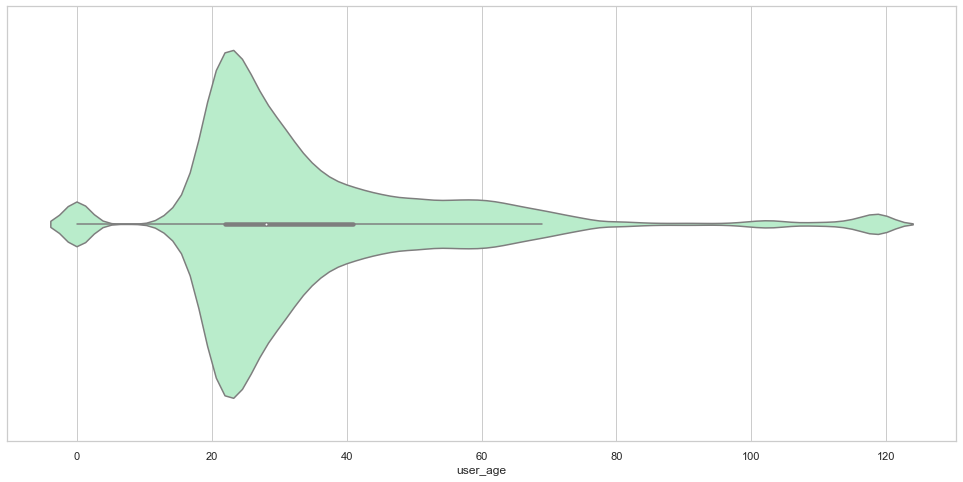

In [141]:
sns.set(rc={'figure.figsize':(17,8)}, style="whitegrid")
sns.violinplot(vk_data['user_age'], color="#B0F5C8")

Наибольшее количество пользователей сосредоточено в диапазоне 20-30 лет.

Посмотрим на количество пользователей каждого пола

In [152]:
us_sex = vk_data.groupby('user_sex', as_index = False) \
        .agg({'hashed_user_id':'count'})

(us_sex.style
     .hide_index()
     .set_caption('Пол пользователей')).highlight_min()

77 пользователей оказались неизвестного пола:) Можем их в дальнейшем определить к мужскому полу.

Теперь посмотрим на бренд устройства с которого заходят юзеры в соц. сеть

In [153]:
dev_brand = vk_data.groupby('device_brand', as_index = False) \
        .agg({'hashed_user_id':'count'}).sort_values(by ='hashed_user_id', ascending=False).head(10)

(dev_brand.style
     .hide_index()
     .set_caption('Топ 10 самых используемых устройств'))

In [154]:
labels=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
vk_data['age_group'] = pd.cut(vk_data.user_age,bins=12,labels=labels,right=True)

In [155]:
group_age = vk_data.groupby('age_group', as_index = False) \
        .agg({'hashed_user_id':'count'}) \
        .sort_values(by ='hashed_user_id', ascending=False)

group_age['count_people'] = group_age.hashed_user_id

group_age.drop('hashed_user_id', axis=1, inplace=True)
group_age

age_group  count_people
2      21-30         53453
3      31-40         21044
1      11-20         15643
4      41-50         10559
5      51-60          8552
6      61-70          6442
0       0-10          3870
11   111-120          2473
7      71-80          2007
10   101-110           913
8      81-90           484
9     91-100           453

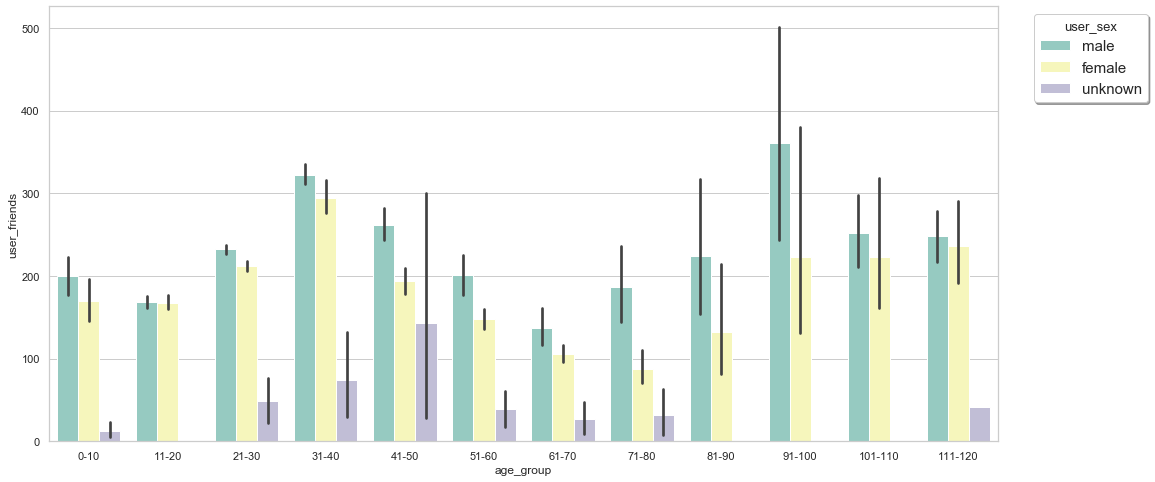

In [156]:
sns.set(rc={'figure.figsize':(17,8)}, style="whitegrid")
sns.barplot(x=vk_data['age_group'],y=vk_data['user_friends'],hue=vk_data.user_sex, palette=("Set3")).legend(fontsize = 15, \
               bbox_to_anchor= (1.03, 1), \
               title="user_sex", \
               title_fontsize = 13, \
               shadow = True, \
               facecolor = 'white');

In [157]:
no_friends = vk_data.query('user_friends == 0').groupby('user_sex', as_index = False) \
        .agg({'hashed_user_id':'count'})

(no_friends.style
     .hide_index()
     .set_caption('Количество профилей без друзей'))

Интересно было бы узнать - используемые это профили или "застывшие".
Отберем только пользователей без друзей и проверим их активность в социальной сети за последние 4 недели.

In [158]:
n_user = vk_data[['user_sex','hashed_user_id', 'messaging_total', 'user_friends', 'days_in_vk_1_week', 
         'days_in_vk_2_weeks', 'days_in_vk_4_weeks', 'days_in_vk_8_weeks']]

In [159]:
pd.pivot_table(n_user.query('user_friends == 0 & messaging_total == 0 & user_sex == "unknown"'),index=["hashed_user_id", 'messaging_total', 'user_friends']). \
                sort_values('days_in_vk_1_week', ascending = False)

days_in_vk_1_week  \
hashed_user_id messaging_total user_friends                      
$1T.tXR/Qjxz.  0               0                             7   
$1ch66ej1PGMo  0               0                             7   
$1liGgG0NzeYQ  0               0                             7   
$1wBgYH4RAp26  0               0                             6   
$1N.uIyWcajfI  0               0                             5   
$17FN8soD9vX2  0               0                             4   
$17T42EIReCK2  0               0                             3   
$1XbbQ9VJ737I  0               0                             3   
$1kQuYsKiLVGA  0               0                             3   
$1wAL.pykt/.I  0               0                             3   

                                             days_in_vk_2_weeks  \
hashed_user_id messaging_total user_friends                       
$1T.tXR/Qjxz.  0               0                             14   
$1ch66ej1PGMo  0               0                             13   
$1liGgG0NzeYQ  0               0                             14   
$1wBgYH4RAp26  0               0                              9   
$1N.uIyWcajfI  0               0                             12   
$17FN8soD9vX2  0               0                              9   
$17T42EIReCK2  0               0                              4   
$1XbbQ9VJ737I  0               0                              6   
$1kQuYsKiLVGA  0               0                              8   
$1wAL.pykt/.I  0               0                              4   

                                             days_in_vk_4_weeks  \
hashed_user_id messaging_total user_friends                       
$1T.tXR/Qjxz.  0               0                             28   
$1ch66ej1PGMo  0               0                             27   
$1liGgG0NzeYQ  0               0                             28   
$1wBgYH4RAp26  0               0                             11   
$1N.uIyWcajfI  0               0                             25   
$17FN8soD9vX2  0               0                             19   
$17T42EIReCK2  0               0                              4   
$1XbbQ9VJ737I  0               0                             13   
$1kQuYsKiLVGA  0               0                             15   
$1wAL.pykt/.I  0               0                             10   

                                             days_in_vk_8_weeks  
hashed_user_id messaging_total user_friends                      
$1T.tXR/Qjxz.  0               0                             56  
$1ch66ej1PGMo  0               0                             50  
$1liGgG0NzeYQ  0               0                             53  
$1wBgYH4RAp26  0               0                             17  
$1N.uIyWcajfI  0               0                             46  
$17FN8soD9vX2  0               0                             37  
$17T42EIReCK2  0               0                              8  
$1XbbQ9VJ737I  0               0                             29  
$1kQuYsKiLVGA  0               0                             25  
$1wAL.pykt/.I  0               0                             13

Интересно, некоторые пользователи заходят в VK каждый день. У них нет друзей.. они не отправляют сообщения.. попробуем определить что ими движет и побуждает использовать соц. сеть

In [160]:
no_friends = pd.pivot_table(vk_data.query('user_friends == 0 & messaging_total == 0 \
                                   & user_sex == "unknown" & timespent_total != 0'),index=["hashed_user_id"])
no_friends = no_friends.reset_index()
no_friends

hashed_user_id  calls_accepted  days_in_vk_1_week  days_in_vk_2_weeks  \
0  $17T42EIReCK2               0                  3                   4   
1  $1T.tXR/Qjxz.               0                  7                  14   
2  $1ch66ej1PGMo               0                  7                  13   
3  $1kQuYsKiLVGA               0                  3                   8   
4  $1liGgG0NzeYQ               0                  7                  14   
5  $1wAL.pykt/.I               0                  3                   4   

   days_in_vk_4_weeks  days_in_vk_8_weeks  messaging_total  timespent_audio  \
0                   4                   8                0                0   
1                  28                  56                0                0   
2                  27                  50                0                0   
3                  15                  25                0                0   
4                  28                  53                0                0   
5                  10                  13                0                0   

   timespent_clips  timespent_feed  timespent_im  timespent_photo  \
0                0             337             0               21   
1                0            1821             0              102   
2                2            7388             0              127   
3                0             639             0               31   
4                0            2162             0              887   
5              163             853             0               53   

   timespent_story  timespent_total  timespent_video  user_age  \
0                0              405                6        71   
1                0             2974              185        40   
2               10            12032             1683        58   
3                0             1233               79        63   
4                0             3107                0         0   
5               17             1767               13        36   

   user_communities_count  user_fans_count  user_friends  \
0                       7                0             0   
1                      19                1             0   
2                      50               14             0   
3                      39                0             0   
4                       3                0             0   
5                       8                0             0   

   user_subscriptions_count  
0                         1  
1                         2  
2                         5  
3                         1  
4                         0  
5                         6

In [161]:
x = no_friends.hashed_user_id
y1 = no_friends.timespent_photo
y2 = no_friends.timespent_clips
y3 = no_friends.timespent_story
y4 = no_friends.timespent_feed
y5 = no_friends.timespent_video

plt.plot(x, y1, '-', x, y2, '--', x, y3, 'r', x, y4, 'g', y5, 'y')

plt.title('Timespent in VK', fontsize=15)
plt.xlabel('Id_user', fontsize=16, color='black')
plt.ylabel('Time', fontsize=16, color='black')
plt.legend(('timespent_photo','timespent_clips', 'timespent_story','timespent_feed', 'timespent_video'))

plt.show()

Можно заметить, что пользователи заменяют общение просмотром ленты и видео в основном.

In [162]:
vk_data_1 = vk_data.copy()

vk_data_1.drop(['timespent_total',
'timespent_im',
'timespent_feed',
'timespent_photo',
'timespent_video',
'timespent_clips',
'timespent_audio',
'timespent_story'],axis=1,inplace=True)

(11.0, 0.0)

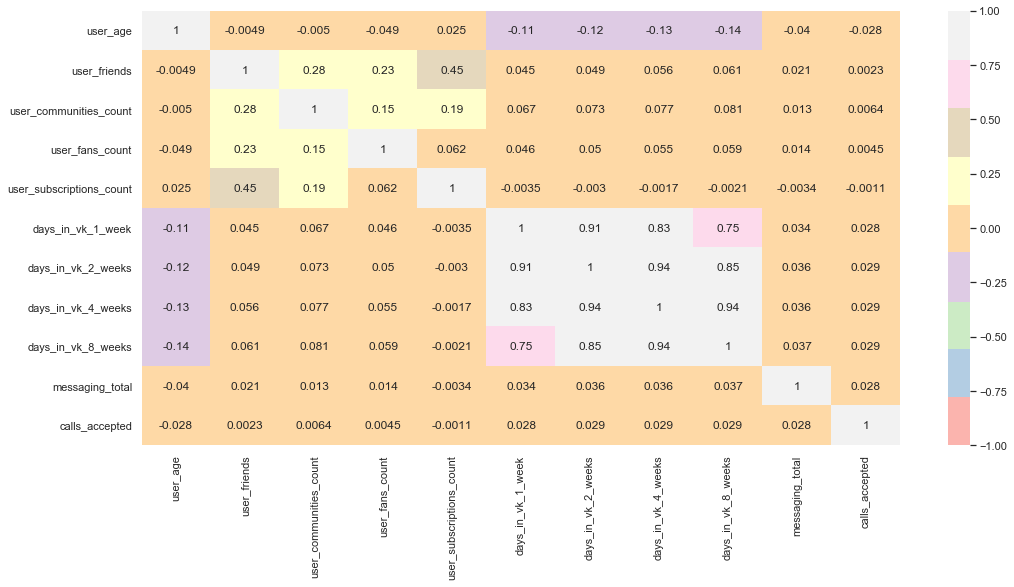

In [163]:
colormap = plt.cm.Pastel1
ax = sns.heatmap(vk_data_1.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap=colormap)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5) 

Можем наблюдать сильную сорреляцию между количеством дней присутствия в VK за последнюю неделю с 2,4,8- ми неделями.
Чуть менее слабая корреляция наблюдается между количество подписок (людей или сообществ) пользователя и количеством друзей.

По итогу разведывательного анализа данных удалось выявить особенности в данных и ответить на поставленные задачи. Разделение на группы пользователей и их отличительные особенности представлены ниже.

<div class="alert alert-block alert-success">
<b>1. Полная изоляция</b> 
</div>

Людей с нулевым количеством друзей и без отправленных сообщений за последние 8 недель в соц. сети ВКонтакте представляют группу - полная изоляция.
На основе проведённого анализа - их отличительная особенность в том, что VK они используют преимущественно для различных активностей - музыка, видео, чтение ленты и.т.д

<div class="alert alert-block alert-warning">
<b>2. Мужской разум</b> 
</div>

Пользователей мужского пола заметно больше, чем женского пола. Кроме того, почти в каждой возрастной категории у мужчин больше друзей, чем у женщин.

<div class="alert alert-block alert-success">
<b>3. Аллея звёзд VK</b> 
</div>

Вполне вероятно, что пользователи с количеством друзей 10 тыс. и тысячными количествами подписчиков являются знаминитостями или другими известными публичными личностями.

<div class="alert alert-block alert-warning">
<b>4. Скроллинг ленты</b> 
</div>

Большинство пользователей предпочитают пролистывать свою ленту и зависать на ней. На втором месте по времяпрепровождению оказался просмотр видео.

<div class="alert alert-block alert-success">
<b>5. Долгожитель</b> 
</div>

Пользователей с максимальным возрастом 111-120 лет оказалось аж 2473. Но не стоит забывать о том, что некоторые пользователи специально выставляют себе другой год рождения.

<div class="alert alert-block alert-warning">
<b>6. Пройденный путь и есть награда. — Стив Джобс</b> 
</div>

Людей, которые посещают VK с продуктов Apple оказалось больше, чем с других устройств.

<div class="alert alert-block alert-success">
<b>7. Поколение Z</b> 
</div>

Людей использующие соц. сеть оказалось больше в возрастной группе 21-30 лет. А на втором месте - возрастная группа 31-40 лет.